In [ ]:
# Correlation matrix (ranges from 1 to -1)
bikes.corr()

# Visualize correlation matrix in Seaborn using a heat map.
sns.heatmap(bikes.corr())

In [ ]:
# Create a list of features.
feature_cols = ['temp', 'season', 'weather', 'humidity']

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=99f)

# Before splitting
print(X.shape)

# After splitting
print(X_train.shape)
print(X_test.shape)

# Before splitting
print(y.shape)

# After splitting
print(y_train.shape)
print(y_test.shape)

In [ ]:
#Train on training set
lr = LinearRegression()
lr.fit(X_train, y_train)

#Check accruacy
y_pred = lr.predict(X_test)

print(metrics.mean_squared_error(y_train, lr.predict(X_train)))
print(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
#Kfold validation
from sklearn import model_selection
kf = model_selection.KFold(n_splits=5, shuffle=True)  #split 5 ways


mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

In [ ]:
# Create X and y.
X = bikes[feature_cols]
y = bikes.total_rentals

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)
linreg.fit(X)

# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)

In [ ]:
from sklearn import metrics

#Find MSE

print(metrics.mean_squared_error(y, y_pred))

In [ ]:
# Pair the feature names with the coefficients.
list(zip(feature_cols, linreg.coef_))

In [ ]:
# Example true and predicted response values
true = [10, 7, 5, 5]
pred = [8, 6, 5, 10]

# Calculate these metrics by hand! Use MSE to find out best combination
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(true, pred))
print('MSE:', metrics.mean_squared_error(true, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

# Feature selection 

In [ ]:
from sklearn.model_selection import train_test_split

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(df, feature_cols):
    X = df[feature_cols]
    y = df.total_rentals
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Compare different sets of features.
print(train_test_rmse(bikes, ['temp', 'season', 'weather', 'humidity']))
print(train_test_rmse(bikes, ['temp', 'season', 'weather']))
print(train_test_rmse(bikes, ['temp', 'season', 'humidity']))

In [ ]:
season_dummies = pd.get_dummies(bikes.season, prefix='season')
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

# Concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns).
bikes_dummies = pd.concat([bikes, season_dummies], axis=1)

# Print five random rows.
bikes_dummies.sample(n=5, random_state=1)

#retrain with dummy variables


# Compare original season variable with dummy variables.
print(train_test_rmse(bikes_dummies, ['temp', 'season', 'humidity']))
print(train_test_rmse(bikes_dummies, ['temp', 'season_2', 'season_3', 'season_4', 'humidity']))

# Knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)



In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)  #need to change the K
knn.fit(X_train, y_train)

In [ ]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))  #accruacy score. Higher the better

In [ ]:
scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])

In [ ]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

In [ ]:
#standardise using scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Project 2

In [81]:
import pandas as pd

data='data/hdb_px.csv'
d1f=pd.read_csv(data)

## Meta data of dataset

https://www.kaggle.com/datasets/denzilg/hdb-flat-prices-19902021-march?select=dummy+variable.csv

Original columns: month, town, flat_type, block, street_name, storey_range, area_sqm, flat_model, lease_start, resale_price

month: Year and month in YYYY-MM format<br><br>
year: Year in YYYY format<br><br>
town: Town according to HDB planning areas (see under categorisation below for all of them). One town (Lim Chu Kang) only has transactions in the early 1990s while Punggol is a very new town without transactions in the early 1990s so you may encounter errors in some scenarios.<br><br>
town_dummy: dummy variable from 1-6 based on my categorisation of towns from most to least prime. These are subjective, not objective so if you disagree with my categorisation and/or want to use your own then go ahead!<br><br>
Categorisation:
north=['SEMBAWANG','YISHUN','WOODLANDS'] --> 5<br>
northwest=['CHOA CHU KANG','BUKIT BATOK','BUKIT PANJANG','LIM CHU KANG'] --> 6<br>
northeast=['HOUGANG','SENGKANG','PUNGGOL'] --> 4<br>
primecentral=['BISHAN','BUKIT TIMAH', 'CENTRAL AREA'] --> 1<br>
geocentral=['ANG MO KIO','TOA PAYOH','SERANGOON'] --> 2<br>
westcentral=['CLEMENTI','QUEENSTOWN','BUKIT MERAH'] --> 2<br>
eastcentral=['KALLANG/WHAMPOA', 'MARINE PARADE','GEYLANG'] --> 3<br>
fareast=['BEDOK','PASIR RIS','TAMPINES'] --> 4<br>
farwest=['JURONG EAST', 'JURONG WEST'] --> 5<br><br>
flat_type: HDB-specified flat type ['4 ROOM' '3 ROOM' '1 ROOM' '5 ROOM' 'EXECUTIVE' '2 ROOM'
'MULTI GENERATION']<br><br>
block: Block number (NOT flat number) of the HDB block<br><br>
street_name: Street name of the HDB block<br><br>
address: Identifying address formed by concatenating block+street_name+"SINGAPORE". No postal code unfortunately but I may try to add it in the future.<br><br>
latitude: Latitude coordinate of the HDB block, mostly between 1.27-1.46<br><br>
longitude: Longitude coordinate of the HDB block, mostly between 103.5-104.0<br><br>
storey_range: 3-number ranges (e.g. 1 TO 3, 19 TO 21) that contain the actual storey number (HDB doesn't reveal the exact floor)<br><br>
storey: Middle number in the storey range, useful as a numerical approximation that can be used for data visualisation/machine learning<br><br>
area_sqm: Size of the flat in square metres<br><br>
flat_model: HDB-specified flat model (not the same as flat type) ['New Generation', 'Improved', 'Standard', 'Model A', 'Apartment', 'Maisonette', 'Model A-Maisonette', 'Simplified', 'Terrace', 'Improved-Maisonette', 'MULTI GENERATION', 'Premium Apartment', 'Multi Generation', 'Adjoined flat', 'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1', 'Type S2', 'Premium Apartment Loft']<br><br>
lease_start: Year in which the 99-year lease commenced.<br><br>
lease_rem: The number of years of remaining lease, as calcualted from 2021-lease_start. For a few anomalies, the year of transaction is BEFORE the year of lease starting which is strange but could be due to house flipping before the Minimum Occupancy Period was introduced?<br><br>
resale_price: The agreed transaction price in nominal SGD of the house, excluding stamp duties and other agent fees <br><br>
price_psm: The price per square metre as calculated from resale_price/area_sqm <br><br>
price_psm_yearly: The "yearly" price per square metre as calculated from price_psm/lease_rem --> removed in Version 2<br><br>
Core CPI: The core CPI index value at the month of the transaction, based on the data by MAS<br><br>
price cpi_adj: The real, inflation-adjusted resale price of the flat, calculated using (resale_price/Core CPI)*100<br><br>
price_psm cpi_adj: The real, inflation-adjusted price per square metre of the flat, which is the best indicator of how expensive the flat is. Calculated using (price_psm/Core CPI)*100<br><br>
bala lease pct: The HDB's land value percentage of freehold land value, referencing Bala's Table. Important to consider because when the 99-year lease expires, the HDBs technically have 0 value. Adjusting for the lease remaining in the same way as inflation-adjusting, you can consider the price that is implied if the flat were to have a full 99-year lease.<br><br>
price lease_adj implied: The resale price implied if the flat were to have a full 99-year lease, calculated from (resale_price/bala lease pct)*96<br><br>
price_psm lease_adj implied: The price per square metre implied if the flat were to have a full 99-year lease, calculated from (price_psm/bala lease pct)*96<br><br>
price cpi_lease_adj implied: The inflation-adjusted resale price implied if the flat were to have a full 99-year lease, calculated from (price cpi_adj/bala lease pct)*96<br><br>
price_psm cpi_lease_adj implied: The inflation-adjusted price per square metre implied if the flat were to have a full 99-year lease, calculated from (price_psm cpi_adj/bala lease pct)*96<br><br>
year_gni: Singapore's GNI per capita (nominal S$) in the year of the transaction


## Target: Predict "price_psm cpi_lease_adj implied"

In [21]:
pd.set_option('display.max_columns', None)
d1f.head()

,month,year,town,town_dummy,flat_type,block,street_name,address,latitude,longitude,storey_range,storey,area_sqm,flat_model,lease_start,lease_rem,resale_price,price_psm,price_psm_yearly,Core CPI,price cpi_adj,price_psm cpi_adj,bala lease pct,price lease_adj implied,price_psm lease_adj implied,price cpi_lease_adj implied,price_psm cpi_lease_adj implied,year_gni
0,1990-01,1990,ANG MO KIO,2,4 ROOM,308,ANG MO KIO AVE 1,308 ANG MO KIO AVE 1 SINGAPORE,1.365485,103.844025,10 TO 12,11,92.0,New Generation,1976,85,86000.0,934.782609,10.997442,61.59,139633.05730,1517.750623,92.9,88869.752422,965.975570,144292.502700,1568.396769,22901
1,1990-01,1990,ANG MO KIO,2,3 ROOM,308,ANG MO KIO AVE 1,308 ANG MO KIO AVE 1 SINGAPORE,1.365485,103.844025,07 TO 09,8,82.0,New Generation,1976,85,59000.0,719.512195,8.464849,61.59,95794.77188,1168.228925,92.9,60968.783638,743.521752,98991.368143,1207.211806,22901
2,1990-01,1990,ANG MO KIO,2,3 ROOM,216,ANG MO KIO AVE 1,216 ANG MO KIO AVE 1 SINGAPORE,1.366272,103.841465,04 TO 06,5,73.0,New Generation,1976,85,47200.0,646.575343,7.606769,61.59,76635.81750,1049.805719,92.9,48775.026911,668.151054,79193.094510,1084.836911,22901
3,1990-01,1990,ANG MO KIO,2,3 ROOM,308,ANG MO KIO AVE 1,308 ANG MO KIO AVE 1 SINGAPORE,1.365485,103.844025,10 TO 12,11,67.0,New Generation,1976,85,47200.0,704.477612,8.287972,61.59,76635.81750,1143.818172,92.9,48775.026911,727.985476,79193.094510,1181.986486,22901
4,1990-01,1990,ANG MO KIO,2,4 ROOM,211,ANG MO KIO AVE 3,211 ANG MO KIO AVE 3 SINGAPORE,1.369226,103.841652,04 TO 06,5,81.0,New Generation,1977,86,80000.0,987.654321,11.484353,61.59,129891.21610,1603.595261,93.3,82315.112540,1016.235957,133650.125891,1650.001555,22901


In [18]:
d1f.isnull().sum()

#No null values

month                              0
year                               0
town                               0
town_dummy                         0
flat_type                          0
block                              0
street_name                        0
address                            0
latitude                           0
longitude                          0
storey_range                       0
storey                             0
area_sqm                           0
flat_model                         0
lease_start                        0
lease_rem                          0
resale_price                       0
price_psm                          0
price_psm_yearly                   0
Core CPI                           0
price cpi_adj                      0
price_psm cpi_adj                  0
bala lease pct                     0
price lease_adj implied            0
price_psm lease_adj implied        0
price cpi_lease_adj implied        0
price_psm cpi_lease_adj implied    0
y

In [30]:
d1f.dtypes

month                               object
year                                 int64
town                                object
town_dummy                           int64
flat_type                           object
block                               object
street_name                         object
address                             object
latitude                           float64
longitude                          float64
storey_range                        object
storey                               int64
area_sqm                           float64
flat_model                          object
lease_start                          int64
lease_rem                            int64
resale_price                       float64
price_psm                          float64
price_psm_yearly                   float64
Core CPI                           float64
price cpi_adj                      float64
price_psm cpi_adj                  float64
bala lease pct                     float64
price lease

In [32]:
d1f.shape

(840918, 28)

In [12]:
d1f.describe(include='all')

,month,year,town,town_dummy,flat_type,block,street_name,address,latitude,longitude,storey_range,storey,area_sqm,flat_model,lease_start,lease_rem,resale_price,price_psm,price_psm_yearly,Core CPI,price cpi_adj,price_psm cpi_adj,bala lease pct,price lease_adj implied,price_psm lease_adj implied,price cpi_lease_adj implied,price_psm cpi_lease_adj implied,year_gni
count,840918,840918.000000,840918,840918.000000,840918,840918,840918,840918,840918.000000,840918.000000,840918,840918.000000,840918.000000,840918,840918.000000,840918.000000,8.409180e+05,840918.000000,840918.000000,840918.000000,8.409180e+05,840918.000000,840918.000000,8.409180e+05,840918.000000,8.409180e+05,840918.000000,840918.000000
unique,375,NaN,27,NaN,7,2510,572,9381,NaN,NaN,25,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1999-03,NaN,TAMPINES,NaN,4 ROOM,2,YISHUN RING RD,211 BOON LAY PL SINGAPORE,NaN,NaN,04 TO 06,NaN,NaN,Model A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6468,NaN,74167,NaN,315272,4363,16368,793,NaN,NaN,213008,NaN,NaN,233098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2004.512196,NaN,3.892261,NaN,NaN,NaN,NaN,1.361102,103.839049,NaN,7.567124,95.608704,NaN,1987.313952,81.780300,2.968002e+05,3062.232943,38.780054,80.222704,3.607913e+05,3718.709303,90.998891,3.142900e+05,3262.187707,3.808532e+05,3948.732221,49518.956025
std,NaN,8.135802,NaN,1.403197,NaN,NaN,NaN,NaN,0.041576,0.073889,NaN,4.657776,26.026266,NaN,9.637392,9.959341,1.509764e+05,1299.310863,19.256850,10.545238,1.616870e+05,1241.736956,4.407041,1.614892e+05,1453.964069,1.696361e+05,1381.597677,15844.785659
min,NaN,1990.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.266682,103.685206,NaN,2.000000,28.000000,NaN,1966.000000,45.000000,5.000000e+03,161.290323,1.920123,61.478000,8.074414e+03,260.464961,71.800000,5.183585e+03,167.212429,8.370883e+03,270.028469,22901.000000
25%,NaN,1998.000000,NaN,2.000000,NaN,NaN,NaN,NaN,1.333346,103.772844,NaN,5.000000,73.000000,NaN,1980.000000,75.000000,1.830000e+05,2238.095238,26.435374,72.429000,2.432166e+05,2975.961115,88.500000,1.932075e+05,2331.203240,2.583465e+05,3106.848880,37363.000000
50%,NaN,2003.000000,NaN,4.000000,NaN,NaN,NaN,NaN,1.354131,103.842792,NaN,8.000000,93.000000,NaN,1986.000000,83.000000,2.780000e+05,2797.619048,33.491765,75.954000,3.442474e+05,3610.835922,92.200000,2.931064e+05,2917.886452,3.652154e+05,3793.907869,40870.000000
75%,NaN,2010.000000,NaN,5.000000,NaN,NaN,NaN,NaN,1.380824,103.897752,NaN,11.000000,114.000000,NaN,1995.000000,90.000000,3.870000e+05,3818.181818,48.392057,87.810000,4.564779e+05,4399.740077,94.600000,4.103072e+05,4092.702169,4.799981e+05,4687.830912,63712.000000


In [41]:
d1f.nunique().sort_values(ascending=True)

town_dummy                              6
flat_type                               7
flat_model                             22
storey                                 22
storey_range                           25
town                                   27
year_gni                               32
year                                   32
lease_start                            54
bala lease pct                         55
lease_rem                              57
area_sqm                              209
Core CPI                              373
month                                 375
street_name                           572
block                                2510
resale_price                         8600
longitude                            9137
latitude                             9145
address                              9381
price lease_adj implied             61554
price_psm                           64743
price cpi_adj                      178155
price_psm_yearly                  

In [40]:
d1f.var().sort_values(ascending=True)

latitude                           1.728572e-03
longitude                          5.459555e-03
town_dummy                         1.968961e+00
bala lease pct                     1.942201e+01
storey                             2.169488e+01
year                               6.619128e+01
lease_start                        9.287933e+01
lease_rem                          9.918846e+01
Core CPI                           1.112020e+02
price_psm_yearly                   3.708263e+02
area_sqm                           6.773665e+02
price_psm cpi_adj                  1.541911e+06
price_psm                          1.688209e+06
price_psm cpi_lease_adj implied    1.908812e+06
price_psm lease_adj implied        2.114012e+06
year_gni                           2.510572e+08
resale_price                       2.279387e+10
price lease_adj implied            2.607877e+10
price cpi_adj                      2.614268e+10
price cpi_lease_adj implied        2.877639e+10
dtype: float64

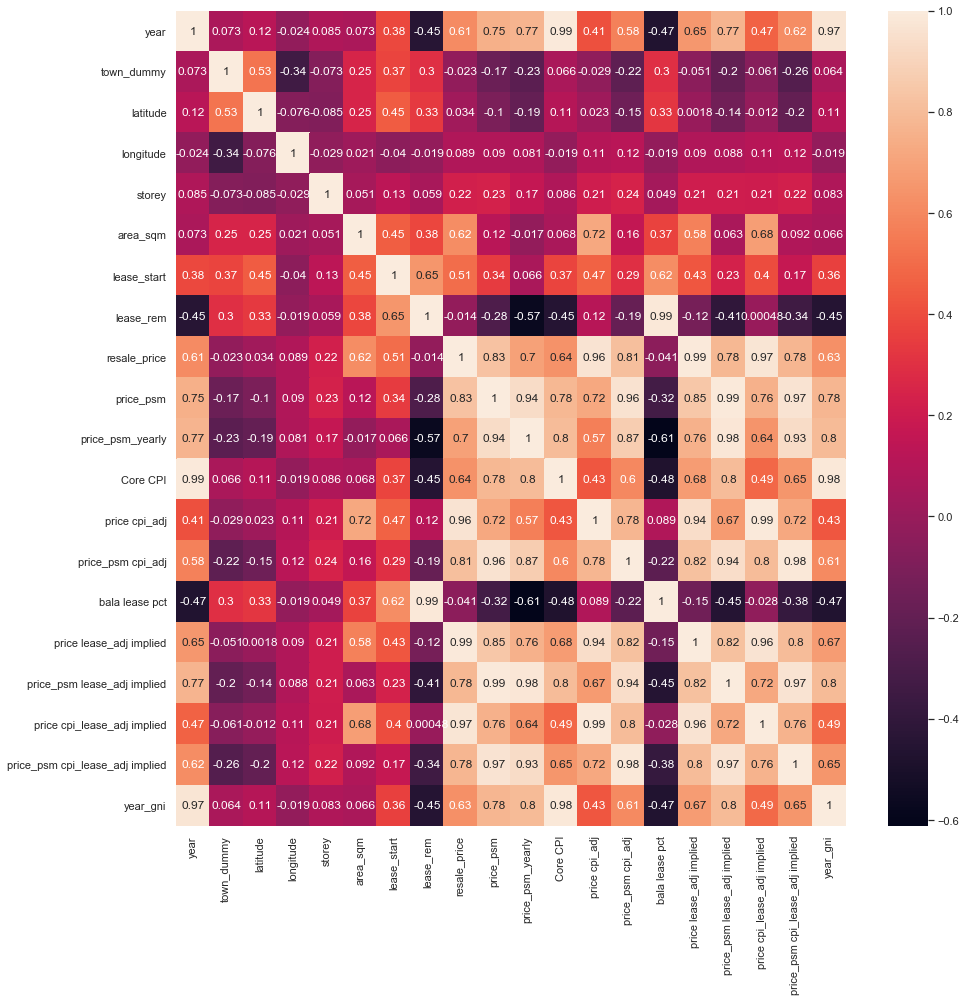

In [83]:
import seaborn as sns
d1f.corr()

sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(d1f.corr(),annot=True);

In [87]:
#Dropping columns that are highly correlated to price_psm cpi_lease_adj implied metric (derived metric based on calculations)

#price_psm
#price_psm_yearly
#Core CPI
#price cpi_adj
#price_psm cpi_adj
#price_psm lease_adj implied
#price cpi_lease_adj implied
#price lease_adj implied



df2=d1f.drop(columns=['price lease_adj implied','price_psm','price_psm_yearly','Core CPI','price cpi_adj','price_psm cpi_adj','price_psm lease_adj implied','price cpi_lease_adj implied'])
df2.head()

,month,year,town,town_dummy,flat_type,block,street_name,address,latitude,longitude,storey_range,storey,area_sqm,flat_model,lease_start,lease_rem,resale_price,bala lease pct,price_psm cpi_lease_adj implied,year_gni
0,1990-01,1990,ANG MO KIO,2,4 ROOM,308,ANG MO KIO AVE 1,308 ANG MO KIO AVE 1 SINGAPORE,1.365485,103.844025,10 TO 12,11,92.0,New Generation,1976,85,86000.0,92.9,1568.396769,22901
1,1990-01,1990,ANG MO KIO,2,3 ROOM,308,ANG MO KIO AVE 1,308 ANG MO KIO AVE 1 SINGAPORE,1.365485,103.844025,07 TO 09,8,82.0,New Generation,1976,85,59000.0,92.9,1207.211806,22901
2,1990-01,1990,ANG MO KIO,2,3 ROOM,216,ANG MO KIO AVE 1,216 ANG MO KIO AVE 1 SINGAPORE,1.366272,103.841465,04 TO 06,5,73.0,New Generation,1976,85,47200.0,92.9,1084.836911,22901
3,1990-01,1990,ANG MO KIO,2,3 ROOM,308,ANG MO KIO AVE 1,308 ANG MO KIO AVE 1 SINGAPORE,1.365485,103.844025,10 TO 12,11,67.0,New Generation,1976,85,47200.0,92.9,1181.986486,22901
4,1990-01,1990,ANG MO KIO,2,4 ROOM,211,ANG MO KIO AVE 3,211 ANG MO KIO AVE 3 SINGAPORE,1.369226,103.841652,04 TO 06,5,81.0,New Generation,1977,86,80000.0,93.3,1650.001555,22901


In [88]:
df2.flat_type.value_counts()

4 ROOM              315272
3 ROOM              275698
5 ROOM              174260
EXECUTIVE            63838
2 ROOM               10059
1 ROOM                1280
MULTI GENERATION       511
Name: flat_type, dtype: int64

In [90]:
#One hot encoding for room type
rm_type_dummies=pd.get_dummies(df2.flat_type, prefix='rm_type')
rm_type_dummies.drop(rm_type_dummies.columns[0],axis=1,inplace=True)
#df2=pd.concat([df2,rm_type_dummies],axis=1)


df2.sample(n=5,random_state=1)


,month,year,town,town_dummy,flat_type,block,street_name,address,latitude,longitude,storey_range,storey,area_sqm,flat_model,lease_start,lease_rem,resale_price,bala lease pct,price_psm cpi_lease_adj implied,year_gni,rm_type_2 ROOM,rm_type_3 ROOM,rm_type_4 ROOM,rm_type_5 ROOM,rm_type_EXECUTIVE,rm_type_MULTI GENERATION
693312,2014-01,2014,GEYLANG,3,3 ROOM,58,CIRCUIT RD,58 CIRCUIT RD SINGAPORE,1.324992,103.886566,01 TO 03,2,55.0,Standard,1969,54,283500.0,76.7,6857.111915,70400,0,1,0,0,0,0
715239,2015-05,2015,KALLANG/WHAMPOA,3,3 ROOM,3,ST. GEORGE'S RD,3 ST. GEORGE'S RD SINGAPORE,1.322767,103.861195,01 TO 03,2,59.0,Improved,1976,60,290000.0,80.0,6228.805505,71283,0,1,0,0,0,0
143872,1996-12,1996,ANG MO KIO,2,4 ROOM,505,ANG MO KIO AVE 8,505 ANG MO KIO AVE 8 SINGAPORE,1.374934,103.850134,01 TO 03,2,93.0,New Generation,1980,83,305000.0,92.2,4775.120676,36724,0,0,1,0,0,0
170574,1997-09,1997,YISHUN,5,4 ROOM,802,YISHUN RING RD,802 YISHUN RING RD SINGAPORE,1.418487,103.831785,01 TO 03,2,105.0,Model A,1987,89,313000.0,94.3,4183.069890,39930,0,0,1,0,0,0
195242,1998-05,1998,TAMPINES,4,4 ROOM,456,TAMPINES ST 42,456 TAMPINES ST 42 SINGAPORE,1.357611,103.954565,10 TO 12,11,84.0,Simplified,1987,88,243000.0,94.0,4091.466847,37072,0,0,1,0,0,0


In [91]:
df2.town.value_counts()

TAMPINES           74167
YISHUN             64104
BEDOK              62194
JURONG WEST        61500
WOODLANDS          59458
ANG MO KIO         48805
HOUGANG            46213
BUKIT BATOK        40806
CHOA CHU KANG      34002
BUKIT MERAH        31067
PASIR RIS          30777
TOA PAYOH          28978
QUEENSTOWN         26407
CLEMENTI           26135
GEYLANG            26056
SENGKANG           25278
BUKIT PANJANG      24867
KALLANG/WHAMPOA    24437
JURONG EAST        23167
SERANGOON          21404
BISHAN             19859
PUNGGOL            13656
SEMBAWANG          11234
MARINE PARADE       7485
CENTRAL AREA        6471
BUKIT TIMAH         2327
LIM CHU KANG          64
Name: town, dtype: int64

In [92]:
#One hot encoding for town
town_dummies=pd.get_dummies(df2.town, prefix='town')
town_dummies.drop(town_dummies.columns[0],axis=1,inplace=True)

#df2=pd.concat([df2,town_dummies],axis=1)

df2.sample(n=5)


,month,year,town,town_dummy,flat_type,block,street_name,address,latitude,longitude,storey_range,storey,area_sqm,flat_model,lease_start,lease_rem,resale_price,bala lease pct,price_psm cpi_lease_adj implied,year_gni,rm_type_2 ROOM,rm_type_3 ROOM,rm_type_4 ROOM,rm_type_5 ROOM,rm_type_EXECUTIVE,rm_type_MULTI GENERATION,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_LIM CHU KANG,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
480856,2005-11,2005,JURONG WEST,5,3 ROOM,936,JURONG WEST ST 91,936 JURONG WEST ST 91 SINGAPORE,1.342506,103.689434,07 TO 09,8,73.0,Model A,1989,83,150000.0,92.2,2712.084836,47046,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
235758,1999-02,1999,CHOA CHU KANG,6,4 ROOM,401,CHOA CHU KANG AVE 3,401 CHOA CHU KANG AVE 3 SINGAPORE,1.379564,103.739955,10 TO 12,11,106.0,Model A,1993,93,262000.0,95.2,3427.063050,37363,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
775522,2018-06,2018,PASIR RIS,4,5 ROOM,124,PASIR RIS ST 11,124 PASIR RIS ST 11 SINGAPORE,1.365877,103.954143,07 TO 09,8,123.0,Improved,1989,70,450000.0,86.0,4133.048431,79517,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
638418,2011-04,2011,PUNGGOL,4,5 ROOM,172C,EDGEDALE PLAINS,172C EDGEDALE PLAINS SINGAPORE,1.395544,103.912453,01 TO 03,2,110.0,Improved,2004,92,470000.0,95.0,4865.785419,65454,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
669307,2012-08,2012,SENGKANG,4,5 ROOM,311D,ANCHORVALE LANE,311D ANCHORVALE LANE SINGAPORE,1.391872,103.884616,13 TO 15,14,111.0,Premium Apartment,2002,89,522888.0,94.3,5245.649504,66330,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [98]:
#Change month to correct format
df2.month=pd.to_datetime(df2.month).dt.month
df2


,month,year,town,town_dummy,flat_type,block,street_name,address,latitude,longitude,storey_range,storey,area_sqm,flat_model,lease_start,lease_rem,resale_price,bala lease pct,price_psm cpi_lease_adj implied,year_gni,rm_type_2 ROOM,rm_type_3 ROOM,rm_type_4 ROOM,rm_type_5 ROOM,rm_type_EXECUTIVE,rm_type_MULTI GENERATION,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_LIM CHU KANG,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
0,1,1990,ANG MO KIO,2,4 ROOM,308,ANG MO KIO AVE 1,308 ANG MO KIO AVE 1 SINGAPORE,1.365485,103.844025,10 TO 12,11,92.0,New Generation,1976,85,86000.0,92.9,1568.396769,22901,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1990,ANG MO KIO,2,3 ROOM,308,ANG MO KIO AVE 1,308 ANG MO KIO AVE 1 SINGAPORE,1.365485,103.844025,07 TO 09,8,82.0,New Generation,1976,85,59000.0,92.9,1207.211806,22901,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1990,ANG MO KIO,2,3 ROOM,216,ANG MO KIO AVE 1,216 ANG MO KIO AVE 1 SINGAPORE,1.366272,103.841465,04 TO 06,5,73.0,New Generation,1976,85,47200.0,92.9,1084.836911,22901,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1990,ANG MO KIO,2,3 ROOM,308,ANG MO KIO AVE 1,308 ANG MO KIO AVE 1 SINGAPORE,1.365485,103.844025,10 TO 12,11,67.0,New Generation,1976,85,47200.0,92.9,1181.986486,22901,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1990,ANG MO KIO,2,4 ROOM,211,ANG MO KIO AVE 3,211 ANG MO KIO AVE 3 SINGAPORE,1.369226,103.841652,04 TO 06,5,81.0,New Generation,1977,86,80000.0,93.3,1650.001555,22901,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840913,1,2021,YISHUN,5,3 ROOM,110,YISHUN RING RD,110 YISHUN RING RD SINGAPORE,1.433340,103.829168,07 TO 09,8,64.0,Simplified,1986,64,273000.0,82.4,4949.860751,75000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
840914,1,2021,YISHUN,5,3 ROOM,712,YISHUN AVE 5,712 YISHUN AVE 5 SINGAPORE,1.430248,103.828862,01 TO 03,2,68.0,New Generation,1984,62,268000.0,81.2,4640.955160,75000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
840915,1,2021,YISHUN,5,2 ROOM,424B,YISHUN AVE 11,424B YISHUN AVE 11 SINGAPORE,1.423215,103.848264,07 TO 09,8,47.0,Model A,2015,93,260000.0,95.2,5556.176866,75000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
840916,1,2021,YISHUN,5,2 ROOM,459,YISHUN AVE 11,459 YISHUN AVE 11 SINGAPORE,1.421059,103.846357,07 TO 09,8,48.0,Model A,2013,91,250000.0,94.8,5253.248609,75000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [99]:
#One hot encoding for flat_model
model_dummies=pd.get_dummies(df2.flat_model, prefix='model')
model_dummies.drop(model_dummies.columns[0],axis=1,inplace=True)

#df2=pd.concat([df2,model_dummies],axis=1)

df2.sample(n=5)



,month,year,town,town_dummy,flat_type,block,street_name,address,latitude,longitude,storey_range,storey,area_sqm,flat_model,lease_start,lease_rem,resale_price,bala lease pct,price_psm cpi_lease_adj implied,year_gni,rm_type_2 ROOM,rm_type_3 ROOM,rm_type_4 ROOM,rm_type_5 ROOM,rm_type_EXECUTIVE,rm_type_MULTI GENERATION,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_LIM CHU KANG,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,model_2-room,model_Adjoined flat,model_Apartment,model_DBSS,model_Improved,model_Improved-Maisonette,model_MULTI GENERATION,model_Maisonette,model_Model A,model_Model A-Maisonette,model_Model A2,model_Multi Generation,model_New Generation,model_Premium Apartment,model_Premium Apartment Loft,model_Premium Maisonette,model_Simplified,model_Standard,model_Terrace,model_Type S1,model_Type S2
151522,1,1997,BEDOK,4,3 ROOM,418,BEDOK NTH AVE 2,418 BEDOK NTH AVE 2 SINGAPORE,1.328720,103.930008,04 TO 06,5,67.0,New Generation,1978,80,205000.0,91.0,4503.469821,39930,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
275783,1,1999,PASIR RIS,4,EXECUTIVE,579,PASIR RIS ST 53,579 PASIR RIS ST 53 SINGAPORE,1.374310,103.947474,07 TO 09,8,148.0,Apartment,1995,95,565000.0,95.6,5268.385424,37363,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
631069,1,2010,TOA PAYOH,2,3 ROOM,169,LOR 1 TOA PAYOH,169 LOR 1 TOA PAYOH SINGAPORE,1.331723,103.842699,10 TO 12,11,76.0,Improved,1972,61,415000.0,80.6,7407.661459,63712,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
282586,1,1999,JURONG EAST,5,4 ROOM,309,JURONG EAST ST 32,309 JURONG EAST ST 32 SINGAPORE,1.347617,103.734360,04 TO 06,5,105.0,Model A,1983,83,240000.0,92.2,3268.760892,37363,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
298860,1,2000,PASIR RIS,4,4 ROOM,750,PASIR RIS ST 71,750 PASIR RIS ST 71 SINGAPORE,1.378177,103.934821,10 TO 12,11,106.0,Model A,1996,95,296000.0,95.6,3826.605804,40870,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
df2.columns

Index(['month', 'year', 'town', 'town_dummy', 'flat_type', 'block',
       'street_name', 'address', 'latitude', 'longitude', 'storey_range',
       'storey', 'area_sqm', 'flat_model', 'lease_start', 'lease_rem',
       'resale_price', 'bala lease pct', 'price_psm cpi_lease_adj implied',
       'year_gni', 'rm_type_2 ROOM', 'rm_type_3 ROOM', 'rm_type_4 ROOM',
       'rm_type_5 ROOM', 'rm_type_EXECUTIVE', 'rm_type_MULTI GENERATION',
       'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG',
       'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA',
       'town_LIM CHU KANG', 'town_MARINE PARADE', 'town_PASIR RIS',
       'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG',
       'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS',
       'town_YISHUN', 'model_2-room', 'model_A

In [104]:
# df2.price_psm cpi_lease_adj implied   #rename it without space

#df2['price_psm cpi_lease_adj implied']

df2.rename(columns={'price_psm cpi_lease_adj implied':'adj_psm'}, inplace=True)
df2.adj_psm

0         1568.396769
1         1207.211806
2         1084.836911
3         1181.986486
4         1650.001555
             ...     
840913    4949.860751
840914    4640.955160
840915    5556.176866
840916    5253.248609
840917    4412.728831
Name: adj_psm, Length: 840918, dtype: float64

### 2) Try with different feature set

In [163]:
feature_cols_rm_type=['rm_type_2 ROOM', 'rm_type_3 ROOM', 'rm_type_4 ROOM','rm_type_5 ROOM']

In [176]:
X_rm = df2[feature_cols_rm_type]
y_rm = df2.adj_psm


#train test split
from sklearn.model_selection import train_test_split

X_rm_train,X_rm_test,y_rm_train,y_rm_test = train_test_split(X_rm,y_rm,test_size=0.3,random_state=1)


from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr_rm = LinearRegression()
lr_rm.fit(X_rm_train,y_rm_train)

y_rm_pred = lr_rm.predict(X_rm_test)

# Print the coefficients.
print(lr_rm.intercept_)
print(list(zip(feature_cols_rm_type, lr_rm.coef_)))

# Performance evaluation
metrics.mean_squared_error(y_rm_test,y_rm_pred)
print(lr_rm.score(X_rm,y_rm)) #weak 


4221.26246028679
[('rm_type_2 ROOM', -373.9316059258027), ('rm_type_3 ROOM', -499.53486407711284), ('rm_type_4 ROOM', -264.57141591025055), ('rm_type_5 ROOM', -23.416199493491497)]
0.018776723917273253


In [184]:
#Try again after standardising adj PSM

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y_rm_stan = scaler.fit_transform(df2[['adj_psm']])

y_rm_stan

array([[-1.72288714],
       [-1.98431286],
       [-2.07288783],
       ...,
       [ 1.16346866],
       [ 0.94420915],
       [ 0.33584081]])

In [185]:
X_rm = df2[feature_cols_rm_type]
#y_rm = df2.adj_psm


#train test split
from sklearn.model_selection import train_test_split

X_rm_train,X_rm_test,y_rm_stan_train,y_rm_stan_test = train_test_split(X_rm,y_rm_stan,test_size=0.3,random_state=1)


from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr_rm = LinearRegression()
lr_rm.fit(X_rm_train,y_rm_stan_train)

y_rm_stan_pred = lr_rm.predict(X_rm_test)

# Print the coefficients.
print(lr_rm.intercept_)
print(list(zip(feature_cols_rm_type, lr_rm.coef_)))

# Performance evaluation
metrics.mean_squared_error(y_rm_test,y_rm_stan_pred)
print(lr_rm.score(X_rm,y_rm_stan)) #weak 

#still poor

[0.19725743]
[('rm_type_2 ROOM', array([-0.27065175, -0.36156341, -0.19149683, -0.01694865]))]
0.018776723917272586


### Try using longitude and latitude

In [197]:
feature_col_coord=['latitude', 'longitude']

X_coord = df2[feature_col_coord]
y_coord = df2.adj_psm


#train test split
from sklearn.model_selection import train_test_split

X_coord_train,X_coord_test,y_coord_train,y_coord_test = train_test_split(X_coord,y_coord,test_size=0.3,random_state=1)


from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr_coord = LinearRegression()
lr_coord.fit(X_coord_train,y_coord_train)

y_coord_pred = lr_coord.predict(X_coord_test)

# Print the coefficients.
print(lr_coord.intercept_)
print(list(zip(feature_col_coord, lr_coord.coef_)))

# Performance evaluation
metrics.mean_squared_error(y_coord_test,y_coord_pred)
print(lr_coord.score(X_coord,y_coord)) #weak 



#try with calculating difference between house and MRT/CBD etc

-193365.07043249096
[('latitude', -6393.731460192259), ('longitude', 1984.002531293897)]
0.05091689911348074


### 3) Try 70% train, 30% test

In [152]:
# Randomly choose all the columns to see performance 

feature_cols_all = ['month', 'year','latitude', 'longitude',
       'storey', 'area_sqm', 'lease_start', 'lease_rem',
       'resale_price', 'bala lease pct',
       'year_gni', 'rm_type_2 ROOM', 'rm_type_3 ROOM', 'rm_type_4 ROOM',
       'rm_type_5 ROOM', 'rm_type_EXECUTIVE', 'rm_type_MULTI GENERATION',
       'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG',
       'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA',
       'town_LIM CHU KANG', 'town_MARINE PARADE', 'town_PASIR RIS',
       'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG',
       'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS',
       'town_YISHUN', 'model_2-room', 'model_Adjoined flat', 'model_Apartment',
       'model_DBSS', 'model_Improved', 'model_Improved-Maisonette',
       'model_MULTI GENERATION', 'model_Maisonette', 'model_Model A',
       'model_Model A-Maisonette', 'model_Model A2', 'model_Multi Generation',
       'model_New Generation', 'model_Premium Apartment',
       'model_Premium Apartment Loft', 'model_Premium Maisonette',
       'model_Simplified', 'model_Standard', 'model_Terrace', 'model_Type S1',
       'model_Type S2']


X = df2[feature_cols_all]
y = df2.adj_psm


#train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Check size
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(588642, 64)
(252276, 64)
(588642,)
(252276,)


In [153]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

# Print the coefficients.
print(lr.intercept_)
list(zip(feature_cols_all, lr.coef_))

49232.64426353551


[('month', -1.9586377550324923e-09),
 ('year', 57.14209755322827),
 ('latitude', -1307.157593743861),
 ('longitude', 243.90468118243214),
 ('storey', 0.25428227288552563),
 ('area_sqm', -32.19206096906659),
 ('lease_start', -88.0018502104448),
 ('lease_rem', 177.4751333055288),
 ('resale_price', 0.011577640994573812),
 ('bala lease pct', -273.583113113823),
 ('year_gni', -0.004151240054170557),
 ('rm_type_2 ROOM', 750.4802259128952),
 ('rm_type_3 ROOM', 781.3276475202957),
 ('rm_type_4 ROOM', 874.2037926261769),
 ('rm_type_5 ROOM', 883.5103567873257),
 ('rm_type_EXECUTIVE', 607.6957722049008),
 ('rm_type_MULTI GENERATION', 1063.4438374398994),
 ('town_BEDOK', -46.4987758397441),
 ('town_BISHAN', 34.09564116653343),
 ('town_BUKIT BATOK', -0.7963890698514398),
 ('town_BUKIT MERAH', 1.2456163650900969),
 ('town_BUKIT PANJANG', 20.269993150073013),
 ('town_BUKIT TIMAH', -28.346725603497237),
 ('town_CENTRAL AREA', 330.6980759824037),
 ('town_CHOA CHU KANG', 63.25464331645232),
 ('town_CLEM

In [154]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
693312,6857.111915,5849.830688
715239,6228.805505,5638.089658
143872,4775.120676,4253.865514
170574,4183.069890,3966.308191
195242,4091.466847,3852.185544
...,...,...
171672,3667.179273,3742.045255
621357,5107.771833,4686.340845
597446,5762.670247,6650.998473
206315,3413.858652,3241.043884


In [155]:
#Evaluate model using MSE
print(metrics.mean_squared_error(y_train,lr.predict(X_train)))
print(metrics.mean_squared_error(y_test,y_pred))

#R^2
print(lr.score(X,y))



#ok fit

202866.09708506404
200534.47299555014
0.8940876138907101


With 70-30 split, MSE = 202866.09708506404 (train), MSE = 200534.47299555014 (test)

R**2 = 0.8940876138907101

### Try with 90-10 split

In [156]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

# Print the coefficients.
print(lr.intercept_)
list(zip(feature_cols_all, lr.coef_))

46765.37698491946


[('month', 4.257955986335998e-09),
 ('year', 56.93766779707593),
 ('latitude', -1377.6846006408703),
 ('longitude', 273.2177791205033),
 ('storey', 0.19280980264846903),
 ('area_sqm', -32.18555107186336),
 ('lease_start', -87.99652735099772),
 ('lease_rem', 177.70204291180096),
 ('resale_price', 0.011577310165591825),
 ('bala lease pct', -274.0902524655479),
 ('year_gni', -0.004064538370357695),
 ('rm_type_2 ROOM', 793.6675672900674),
 ('rm_type_3 ROOM', 825.5711618016404),
 ('rm_type_4 ROOM', 919.0736536746087),
 ('rm_type_5 ROOM', 925.8894986270259),
 ('rm_type_EXECUTIVE', 654.3305710340969),
 ('rm_type_MULTI GENERATION', 1035.7669304841663),
 ('town_BEDOK', -52.520532371646354),
 ('town_BISHAN', 32.38624968299735),
 ('town_BUKIT BATOK', 1.854956737374204),
 ('town_BUKIT MERAH', -3.6810314170955145),
 ('town_BUKIT PANJANG', 22.9443941728278),
 ('town_BUKIT TIMAH', -33.52684340572091),
 ('town_CENTRAL AREA', 321.0833154330327),
 ('town_CHOA CHU KANG', 67.08420508484662),
 ('town_CLEME

In [157]:
#Evaluate model using MSE
print(metrics.mean_squared_error(y_train,lr.predict(X_train)))
print(metrics.mean_squared_error(y_test,y_pred))

#R^2
print(lr.score(X,y))

202357.12085461698
200416.14263080075
0.8940894923512275


With 90-10 split, MSE = 202357.12085461698 (train), MSE = 200416.14263080075 (test)
R**2 = 0.8940894923512275

### 70-30 vs 90-10 conclusion

MSE = 202866.09708506404 (train) < MSE = 202357.12085461698 (train) <br><br>
MSE = 200534.47299555014 (test) > 200416.14263080075 (test)<br><br>
R**2 = 0.8940876138907101 < 0.8940894923512275

### 4) Try with K fold validation to see if there is improvement in performance

In [151]:
#Kfold validation
import numpy as np
from sklearn import model_selection
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=1)  #split 5 ways


mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

print(lr.intercept_)
list(zip(feature_cols_all, lr.coef_))



~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 200561.39319109503
R2: 0.8940881578983714

Model 2
MSE: 201659.54506852673
R2: 0.8940869514789863

Model 3
MSE: 203459.0996385691
R2: 0.8940888511327794

Model 4
MSE: 203061.16649513828
R2: 0.8940871314608009

Model 5
MSE: 202340.45784377313
R2: 0.8940875217152111

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 202216.33244742043
Mean of R2 for all folds: 0.8940877227372297
46746.57002624962


[('month', 7.3120239306571645e-09),
 ('year', 55.118648501446664),
 ('latitude', -1500.071476058049),
 ('longitude', 276.21466538573145),
 ('storey', 0.15348495825224262),
 ('area_sqm', -32.18152783775852),
 ('lease_start', -86.16742356031939),
 ('lease_rem', 175.92261543316746),
 ('resale_price', 0.011585460326180907),
 ('bala lease pct', -274.2639142683718),
 ('year_gni', -0.0040551835709266015),
 ('rm_type_2 ROOM', 763.930324396401),
 ('rm_type_3 ROOM', 795.346520915046),
 ('rm_type_4 ROOM', 888.1227960208092),
 ('rm_type_5 ROOM', 895.3416238800061),
 ('rm_type_EXECUTIVE', 624.752828251891),
 ('rm_type_MULTI GENERATION', 1086.8531313169574),
 ('town_BEDOK', -57.36327786565454),
 ('town_BISHAN', 28.678571003893172),
 ('town_BUKIT BATOK', 0.22574402613054545),
 ('town_BUKIT MERAH', -12.413152455123745),
 ('town_BUKIT PANJANG', 22.553475531491426),
 ('town_BUKIT TIMAH', -50.581296406457405),
 ('town_CENTRAL AREA', 314.23415274766637),
 ('town_CHOA CHU KANG', 69.5950564307103),
 ('town_

### Conclusion: With Kfold, R^2 is slightly lower and MSE is higher

**Kfold = 5** <br><br>
Mean of MSE for all folds: 202216.33244742043<br><br>
Mean of R2 for all folds: 0.8940877227372297<br><br>

**90-10 split**<br><br>
MSE = 200416.14263080075 (test) <br><br>
R**2 = 0.8940894923512275<br><br>



## Trying with different value of K fold validation

In [162]:
#Kfold validation
import numpy as np
from sklearn import model_selection

mse_values = []
scores = []
n = 0

for k_val in range(5,11):
    kf = model_selection.KFold(n_splits=k_val, shuffle=True, random_state=1)  #split 5 ways
    print(" ")
    print("~~~~ CROSS VALIDATION each fold where fold = {} ~~~~".format(k_val))
    for train_index, test_index in kf.split(X, y):
        lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])

        mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
        scores.append(lr.score(X, y))

        #n += 1

        #print('Model {}'.format(n))
        #print('MSE: {}'.format(mse_values[n-1]))
        #print('R2: {}\n'.format(scores[n-1]))


    print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
    print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
    print('Mean of R2 for all folds: {}'.format(np.mean(scores)))



 
~~~~ CROSS VALIDATION each fold where fold = 5 ~~~~
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 202216.33244742043
Mean of R2 for all folds: 0.8940877227372297
 
~~~~ CROSS VALIDATION each fold where fold = 6 ~~~~
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 202217.03458650663
Mean of R2 for all folds: 0.8940880114564195
 
~~~~ CROSS VALIDATION each fold where fold = 7 ~~~~
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 202213.10157558846
Mean of R2 for all folds: 0.8940884376359358
 
~~~~ CROSS VALIDATION each fold where fold = 8 ~~~~
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 202215.46242855597
Mean of R2 for all folds: 0.8940885716901451
 
~~~~ CROSS VALIDATION each fold where fold = 9 ~~~~
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 202214.8759165131
Mean of R2 for all folds: 0.8940887741637886
 
~~~~ CROSS VALIDATION each fold where fold = 10 ~~~~
~~~~ SUMMARY OF CROSS VALIDATIO

### Conclusion: Running more folds increases R^2 and generally decreases MSE (although fluctuates a lil)

## KNN regression


In [278]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X[:5000], y[:5000], random_state=1)   #too long to run 500K rows

In [279]:
knn = KNeighborsRegressor(n_neighbors=1)  #1 neighbour
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [280]:
y_pred_knn = knn.predict(X_test)
print(metrics.mean_squared_error(y_test,y_pred_knn)) 

5779.004430581379


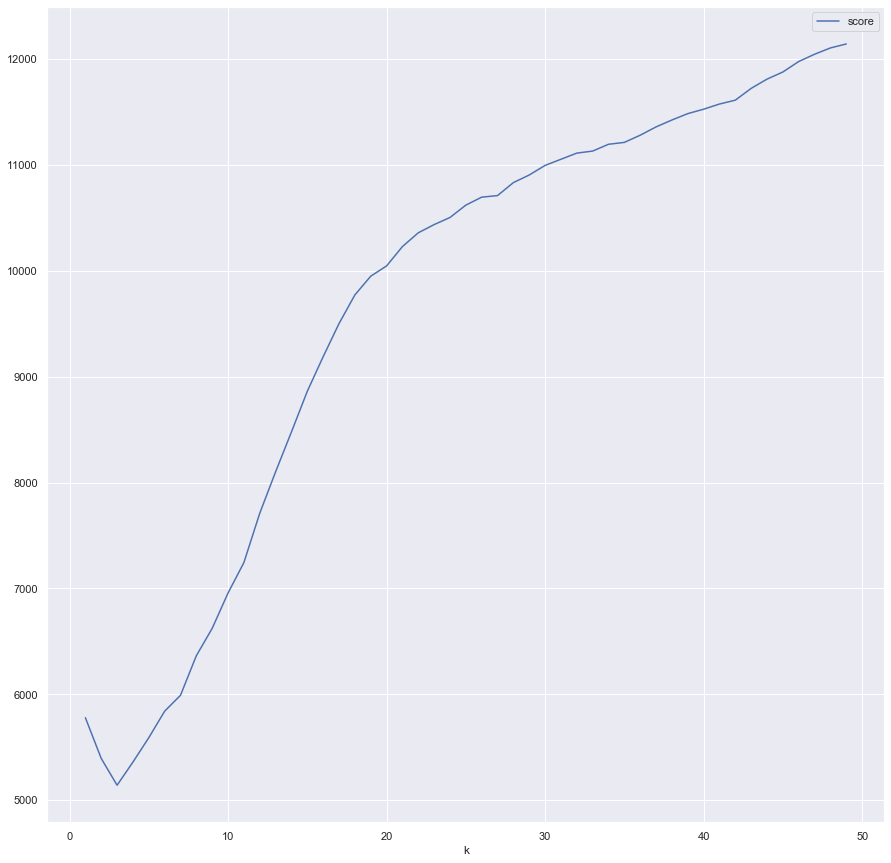

In [281]:
scores = []
for k in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    score = metrics.mean_squared_error(y_test,pred)
    scores.append([k, score])
    
data = pd.DataFrame(scores,columns=['k','score'])

data.plot.line(x='k',y='score');

In [282]:
data.sort_values(by = ['score'], ascending = True)   # k = 3 is the best

,k,score
2,3,5140.972791
3,4,5359.487649
1,2,5394.191087
4,5,5589.925672
0,1,5779.004431
5,6,5840.145892
6,7,5990.538990
7,8,6364.406189
8,9,6622.944921
9,10,6956.951872
